MILESTONE 1

# Perkenalan

# I. Identifikasi Masalah
* Nama : Iqbal Awis Nurdiansyah
* Batch : RMT-19

Latar belakang : Saya adalah seorang data analis yang bekerja disalah satu liga sepakbola terbaik didunia yaitu Liga Premier Inggris , saya bertugas untuk menganalisa seluruh line up dan team yang akan bermain di Premier League Season 2017/18

**Objectiv**: Memberikan informasi kepada seluruh penonton tentang data pemain dan data tim yang akan bertanding di Premier League Season 2017/18

**Problem Statement** : 


*   Siapakah pemain dengan market value tertinggi?
*   Tim yang memiliki rata-rata pemain market value tertinggi?
*   Carilah club yang memiliki rata - rata pemain termuda
*   tentukan jumlah pemain berdasarkan posisi nya
*   pemain dengan region mana yang paling banyak bermain di Premier League ? apakah asal inggris?
*   Uji hipotesis, apakah rata-rata nilai market value chelsea sama dengan arsenal?





**SMART METHOD**

* **Spesific** mengetahui data pemain dan tim yang akan bermain di Premier League Seasons 2017/18
* **Measurable** mengetahui data market value, jumlah pemain, dan asal pemain di Premier League Season 2017 / 2018
* **Achievable** Pengolahan data menggunakan metode data wrangling atau preprocessing untuk menampilkan beberapa insight 
* **Relevant** Sebagai Seorang data analisis tentunya preprocessing data sangat membantu untuk mengolah data di Premier League
* **Time-Bond** Penggunan data yang dibutuhkan adalah Premier League Musim 2017/18


# II. Data Loading

## Import Library

In [2]:
# import library
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns


Source datasets: `https://www.kaggle.com/datasets/mauryashubham/english-premier-league-players-dataset?datasetId=1808`

In [3]:
df=pd.read_csv('epldata_final.csv')
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


ini adalah dataset Roaster seluruh team Primier League Season 2017/18

# III. Data Cleaning

## Missing Value

In [5]:
#Cek Missing value
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

terdapat missing value pada kolom region

In [6]:
# memilih baris yang memiliki nilai yang hilang pada kolom 'region'
missing_values = df.loc[df['region'].isna()]
print(missing_values)

             name          club  age position  position_cat  market_value  \
188  Steve Mounie  Huddersfield   22       CF             1           5.5   

     page_views  fpl_value fpl_sel  fpl_points  region nationality  \
188          56        6.0   0.60%           0     NaN       Benin   

     new_foreign  age_cat  club_id  big_club  new_signing  
188            0        2        8         0            0  


terdapat missing value pada `region` dengan pemain bernama "Steve Mounie"

In [7]:
# mengisi nilai yang hilang pada kolom 'region' dengan nilai 'Rest of World'
df['region'] = df['region'].fillna('Rest Of World')

mengisi `region` pemain bernama Steve Mounie dengan value "Rest Of World" karena pemain tersebut berasal dari negara Benin. Diluar Inggirs, Uni Eropa dan America

In [8]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

Data sudah bersih dari missing value

## Drop Coloumn

In [9]:
#drop table
df_drop = df.drop(['new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing'], axis=1)
df_drop

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France
...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.40%,38,2.0,Switzerland
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.20%,34,4.0,Congo DR
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.30%,29,1.0,England
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.90%,16,1.0,England


drop kolom 'new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing' karena tidak akan dibutuhkan dalam Problem Statement

## Manipulasi Data

In [10]:
#Manipulasi data
df_drop['position_cat']=df_drop['position_cat'].astype(str)
df_drop['region']=df_drop['region'].astype(str)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    object 
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    object 
 11  nationality   461 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 43.3+ KB


Kolom `position_cat` dan `region` dirubah kedalam bentuk string agar dapat dirubah value nya menjadi informasi yang lebih jelas

## Manipulasi value

In [11]:
#update value kolom position_cat
df_drop['position_cat'] = df_drop['position_cat'].replace({'1': 'attacker', '2': 'midfielder', '3': 'defender', '4': 'goalkeeper'})

#update value kolom region
df_drop['region'] = df_drop['region'].replace({'1.0': 'England', '2.0': 'EU', '3.0': 'Americas', '4.0': 'Rest Of World'})
df_drop

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality
0,Alexis Sanchez,Arsenal,28,LW,attacker,65.0,4329,12.0,17.10%,264,Americas,Chile
1,Mesut Ozil,Arsenal,28,AM,attacker,50.0,4395,9.5,5.60%,167,EU,Germany
2,Petr Cech,Arsenal,35,GK,goalkeeper,7.0,1529,5.5,5.90%,134,EU,Czech Republic
3,Theo Walcott,Arsenal,28,RW,attacker,20.0,2393,7.5,1.50%,122,England,England
4,Laurent Koscielny,Arsenal,31,CB,defender,22.0,912,6.0,0.70%,121,EU,France
...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,midfielder,5.0,288,4.5,0.40%,38,EU,Switzerland
457,Arthur Masuaku,West+Ham,23,LB,defender,7.0,199,4.5,0.20%,34,Rest Of World,Congo DR
458,Sam Byram,West+Ham,23,RB,defender,4.5,198,4.5,0.30%,29,England,England
459,Ashley Fletcher,West+Ham,21,CF,attacker,1.0,412,4.5,5.90%,16,England,England


pada kolom position_cat dirubah menjadi : 

* 1=attacker,
* 2=midfilder,
* 3=defender,
* 4=goalkeeper

pada kolom region :

* 1.0 = England
* 2.0 = EU
* 3.0 = Americas
* 4.0 = Rest Of World

data dirubah dengan maksud agar data terlihat lebih jelas ketika divisualisasikan
dan data siap diexplorasi sesuai dengan problem statement

In [12]:
clean_data=df_drop
clean_data

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality
0,Alexis Sanchez,Arsenal,28,LW,attacker,65.0,4329,12.0,17.10%,264,Americas,Chile
1,Mesut Ozil,Arsenal,28,AM,attacker,50.0,4395,9.5,5.60%,167,EU,Germany
2,Petr Cech,Arsenal,35,GK,goalkeeper,7.0,1529,5.5,5.90%,134,EU,Czech Republic
3,Theo Walcott,Arsenal,28,RW,attacker,20.0,2393,7.5,1.50%,122,England,England
4,Laurent Koscielny,Arsenal,31,CB,defender,22.0,912,6.0,0.70%,121,EU,France
...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,midfielder,5.0,288,4.5,0.40%,38,EU,Switzerland
457,Arthur Masuaku,West+Ham,23,LB,defender,7.0,199,4.5,0.20%,34,Rest Of World,Congo DR
458,Sam Byram,West+Ham,23,RB,defender,4.5,198,4.5,0.30%,29,England,England
459,Ashley Fletcher,West+Ham,21,CF,attacker,1.0,412,4.5,5.90%,16,England,England


* name: Nama Pemain
* club: Nama Club
* age : Umur Player
* position : posisi bermain
* position_cat : katagori posisi
* market_value : nilai jual pemain dalam (juta Pounds)
* page_views : rata-rata dicari di website wikipedia
* fpl_value : nilai di aplikasi fantasy premier league
* fpl_sel : persentase terpilih di skuad inti
* fpl_points : point fpl diambil dari season sebelumnya
* region: asal region pemain
* nationality : player nationality


# IV. Analisis & Perhitungan

# 1. Siapakah  pemain dengan market value tertinggi?

In [13]:
#sort market value
df_sorted = clean_data.sort_values('market_value', ascending=False)
df_sorted

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality
92,Eden Hazard,Chelsea,26,LW,attacker,75.00,4220,10.5,2.30%,224,EU,Belgium
263,Paul Pogba,Manchester+United,24,CM,midfielder,75.00,7435,8.0,19.50%,115,EU,France
0,Alexis Sanchez,Arsenal,28,LW,attacker,65.00,4329,12.0,17.10%,264,Americas,Chile
240,Kevin De Bruyne,Manchester+City,26,AM,attacker,65.00,2252,10.0,17.50%,199,EU,Belgium
241,Sergio Aguero,Manchester+City,29,CF,attacker,65.00,4046,11.5,9.70%,175,Americas,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...
436,Sam Field,West+Brom,19,CM,midfielder,0.25,15,4.5,0.10%,9,England,England
177,Jack Payne,Huddersfield,25,CM,midfielder,0.25,81,4.5,0.10%,0,England,England
178,Dean Whitehead,Huddersfield,35,CM,midfielder,0.25,161,4.5,0.10%,0,England,England
283,Joel Castro Pereira,Manchester+United,21,GK,goalkeeper,0.10,395,4.0,1.00%,6,EU,Portugal


data tersebut mengurutkan pemain berdasarkan market value

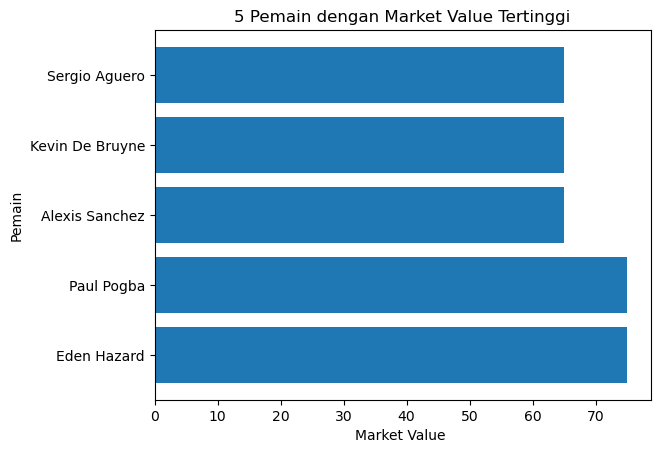

In [14]:
# mengurutkan pemain berdasarkan market value tertinggi
df_sorted = clean_data.sort_values('market_value', ascending=False)

# membuat bar plot
plt.barh(df_sorted['name'].head(5), df_sorted['market_value'].head(5))
plt.xlabel('Market Value ')
plt.ylabel('Pemain')
plt.title('5 Pemain dengan Market Value Tertinggi')
plt.show()

Eden hazard dan paul pogba merupakan pemain dengan market value tertinggi dengan harga 75juta pounds, disusul dengan alexis sanchez, kevin De bruyne, dan sergio aguero dengan masing-masing memiliki nilai market value sebesar 65juta pounds

# 2.  Tim yang memiliki rata-rata pemain market value tertinggi?

In [15]:
# mengelompokkan pemain berdasarkan klub dan menghitung rata-rata market value tiap klub
club_mean = clean_data.groupby('club')['market_value'].mean()

# mengurutkan klub berdasarkan rata-rata market value tertinggi dan mengambil 5 klub teratas
club_sorted = club_mean.sort_values(ascending=False).head(5)
club_sorted

club
Manchester+City      28.200000
Chelsea              27.677500
Tottenham            23.000000
Manchester+United    20.564000
Arsenal              19.642857
Name: market_value, dtype: float64

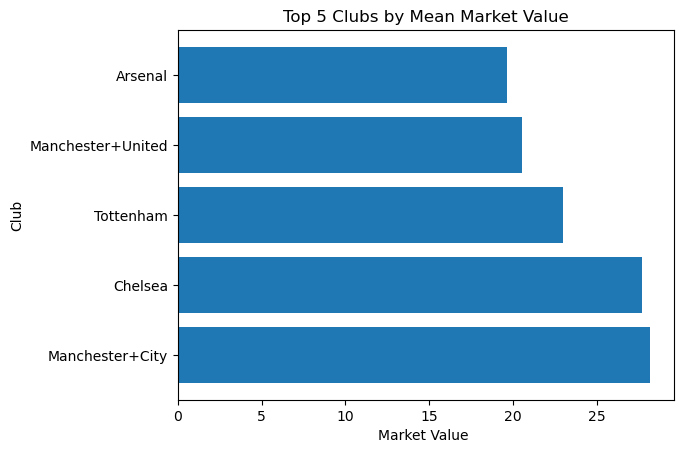

In [16]:
# membuat bar plot dari hasil tersebut
plt.barh(club_sorted.index, club_sorted.values)

# menambahkan label pada sumbu x dan y
plt.xlabel('Market Value ')
plt.ylabel('Club')

# menambahkan judul plot
plt.title('Top 5 Clubs by Mean Market Value')

# menampilkan plot
plt.show()


Club dengan market value tertinggi : 
* Manchester City = 28.2 Juta Pounds
* Chelsea = 27.6 Juta Pounds
* Tottenham = 23 Juta Pounds
* Manchester United = 20.5 Juta Pounds
* Arsenal = 19.6 Juta Pounds

# 3. Carilah club yang memiliki rata - rata pemain termuda

In [17]:
player_mean = clean_data.groupby('club')['age'].mean()

# mengurutkan klub berdasarkan rata-rata pemain dengan usia terendah  
player_sorted = player_mean.sort_values(ascending=True).head(5)
player_sorted

club
Liverpool            24.777778
Southampton          24.956522
Manchester+United    25.560000
Tottenham            25.650000
Huddersfield         26.000000
Name: age, dtype: float64

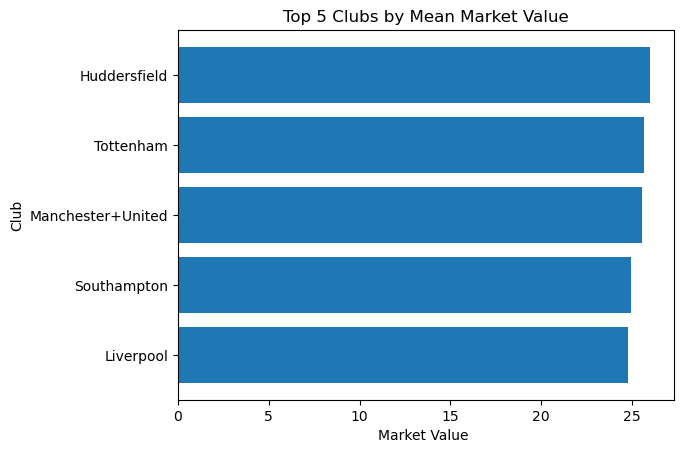

In [18]:
plt.barh(player_sorted.index, player_sorted.values)

# menambahkan label pada sumbu x dan y
plt.xlabel('Market Value ')
plt.ylabel('Club')

# menambahkan judul plot
plt.title('Top 5 Clubs by Mean Market Value')

# menampilkan plot
plt.show()


Karena Liverpool memiliki rata-rata umur terendah dari semua club, jadi boleh dikatakan Liverpool merupakan tim yang memiliki squad dengan rata-rata termuda yaitu 24 tahun

# 4. jumlah pemain berdasarkan kategori posisi nya

In [19]:
clean_data.groupby(['position_cat'])['position_cat'].count()

position_cat
attacker      154
defender      153
goalkeeper     42
midfielder    112
Name: position_cat, dtype: int64

* attacker berjumlah : 154 orang
* defender berjumlah : 153 orang
* goalkeeper berjumlah : 154 orang
* midfilder berjumlah : 154 orang

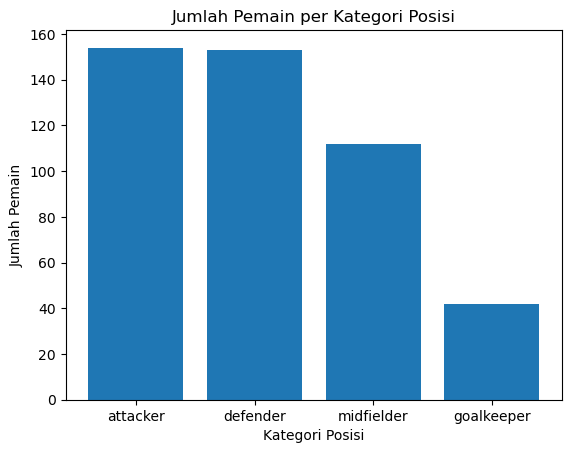

In [20]:
pos = clean_data.groupby(['position_cat'])['position_cat'].count().to_frame(name='player_count')
pos_sorted = pos.sort_values(by='player_count', ascending=False)

plt.bar(pos_sorted.index, pos_sorted['player_count'])
plt.xlabel('Kategori Posisi')
plt.ylabel('Jumlah Pemain')
plt.title('Jumlah Pemain per Kategori Posisi')
plt.show()

pemain  yang berposisi sebagai `attacker` adalah posisi yang terbanyak pada Premier League Season 2017/18 

# Statistic Descriptive

## 5. Pemain dengan region mana yang paling banyak bermain di Premier League ? apakah asal inggris?

Modus dari kolom region adalah: EU


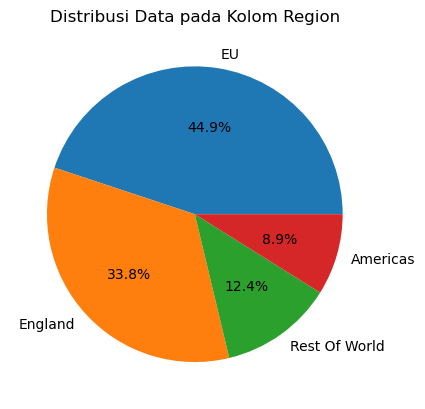

In [21]:
# Mencari modus kolom region
modus_region = clean_data['region'].mode()[0]
print('Modus dari kolom region adalah:', modus_region)

# Menghitung jumlah data untuk masing-masing nilai pada kolom region
count_by_region = clean_data['region'].value_counts()

# Memvisualisasikan kolom region menggunakan pie chart
plt.pie(count_by_region, labels=count_by_region.index, autopct='%1.1f%%')
plt.title('Distribusi Data pada Kolom Region')
plt.show()






untuk mencari region mana yang paling banyak bermain diPremier League Season 2017/18 adalah dengan mencari **modus** pada kolom `region`.
Inggris bukanlah region terbanyak tetapi Pemain asal EU adalah region terbanyak dari jumlah pemain yang ada dipremier league

# Statistic Inferential

## 6. Uji hipotesis, apakah rata-rata nilai market value chelsea sama dengan arsenal?

One Sample Two tailed


Our Hypothesis on this case : 
* H0 : market value chelsea = market_value_arsenal
* H1 : market value chelsea != market_value_arsenal


In [22]:
# extract  market value data dari Chelsea and Arsenal
market_value_chelsea = clean_data[clean_data['club'] == 'Chelsea']['market_value']
market_value_arsenal = clean_data[clean_data['club'] == 'Arsenal']['market_value']

# perform t-test
t, p = ttest_ind(market_value_chelsea, market_value_arsenal)

# print p-value
print("p-value = ", p)

p-value =  0.09319356813417434


dikarenakan p-value >0.05, berarti kita tolak H0. Yang berarti market value pemain chelsea `tidak sama dengan` market value pemain arsenal

C:\Users\maddi\AppData\Local\Temp\ipykernel_14660\2519579805.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_value_chelsea, label='Chelsea')
C:\Users\maddi\AppData\Local\Temp\ipykernel_14660\2519579805.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(market_value_arsenal, label='Ar

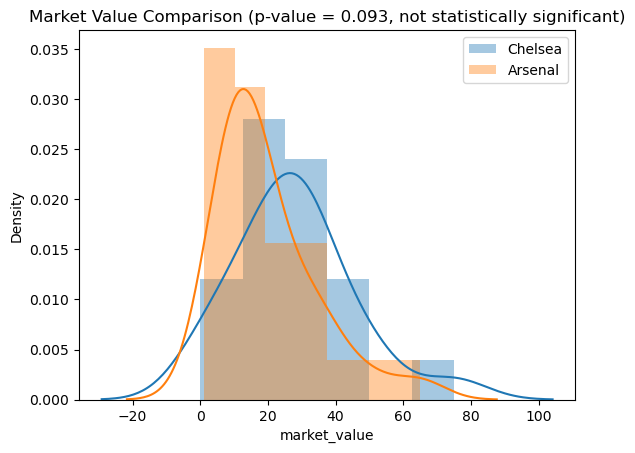

In [23]:
# membuat distribution plot
sns.distplot(market_value_chelsea, label='Chelsea')
sns.distplot(market_value_arsenal, label='Arsenal')

# add legend and p-value to plot
plt.legend()
if p < 0.05:
    plt.title('Market Value Comparison (p-value = {:.3f}, statistically significant)'.format(p))
else:
    plt.title('Market Value Comparison (p-value = {:.3f}, not statistically significant)'.format(p))

# show plot
plt.show()

dari grafik tersebut terlihat terdapat perbedaan antara rata rata market value pemain chelsea dan arsenal walaupun tidak cukup signifikan secara statistik.

# Kesimpulan

Dari seluruh penjabaran diatas dapat disimpulkan bahwa Liga Premier Inggris memiliki banyak pemain bintang, dengan adanya Paul Pogba dan Eden Hazard sebagai pemain termahal mencapai angka 75juta pounds, ini menggambarkan bahwa Premier League adalah salah satu Liga Sepakbola Professional terbaik didunia saat ini. Namun sayangnya pemain asli Inggris harus kalah jumlah dari pemain asing. Ini merupakan catatan yang sangat besar bagi Pengurus Sepakbola di Inggris untuk lebih baik lagi dalam pembinaan pemain usia muda, agar para pemain asli inggris dapat kesempatan untuk bermain di negara sendiri.

# Dashboard

`https://lookerstudio.google.com/reporting/446a94a0-e8e0-43ae-93a1-daf1c27ecd1a`

In [27]:
clean_data.to_excel('data.xls', index=False)

C:\Users\maddi\AppData\Local\Temp\ipykernel_14660\1370368592.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  clean_data.to_excel('data.xls', index=False)


ModuleNotFoundError: No module named 'xlwt'